<a href="https://colab.research.google.com/github/guimaraess2/-Time-Series-Analysis-and-Forecasting-/blob/main/M%C3%A9dias_M%C3%B3veis_Covid_19_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


**Importando as bibliotecas / Importing the libraries**

In [140]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas import concat
from pandas import Grouper
from pandas import  DataFrame
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
import seaborn as sns

**Importando o dataset / Importing the dataset** 

In [87]:
colunas=['Date', 'Deaths - Total']
series = read_csv('/content/sample_data/COV_19.csv', header=0, index_col=0, squeeze=True, parse_dates=True, usecols= colunas)

**Eliminando linhas com valores nulos / Eliminating rows with null values**

In [88]:
series.drop(series.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], inplace=True)

**Criando mum objeto rolling de janela / Creating a window rolling object**

In [89]:
rolling = series.rolling(window=3)

In [90]:
rolling_mean = rolling.mean()

**Visualizando os dados originais da média móvel / Viewing the original moving average data**

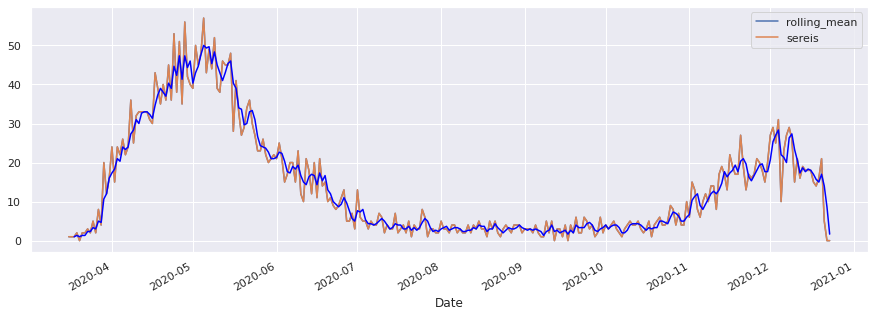

In [154]:
import matplotlib.pyplot as plt
series.plot(figsize=(15,5))
series.plot()
rolling_mean.plot(color='blue')
plt.legend(['rolling_mean', 'sereis']);
plt.show()


**Utilizando médias móveis como Feature Engeneering / Using moving averages as Feature Engeneering**

In [161]:
df = DataFrame(series.values)


In [93]:
tamanho=3

In [94]:
lag1 = df.shift(1)

In [95]:
lag3=df.shift(tamanho)

**Criando uma janela utilizado o método rolling / Creating a window using the rolling method**

In [96]:
window=lag3.rolling(window=tamanho)

In [97]:
media = window.mean()

In [98]:
dataframe = concat([media, lag1, df], axis=1)

In [103]:
dataframe.columns=['media', 't', 't+1']

In [104]:
dataframe.head(15)

,media,t,t+1
0,NaN,NaN,1
1,NaN,1.0,1
2,NaN,1.0,1
3,NaN,1.0,2
4,NaN,2.0,0
5,1.000000,0.0,2
6,1.333333,2.0,2
7,1.000000,2.0,3
8,1.333333,3.0,2
9,1.333333,2.0,5


**Definindo a janela deslizante / Defining the sliding window**

In [112]:
window=3

Definindo os valores da série

In [113]:
history = [series.values[i] for i in range(window)]

In [114]:
history

[1, 1, 1]

In [115]:
history=[x[i] for i in range(window, len(x))]

In [116]:
test = [series.values[i] for i in range(window, len(series.values))]

In [117]:
test[:10]

[2, 0, 2, 2, 3, 2, 5, 2, 8, 4]

**Previsão com média móvel / Forecast with moving average**

In [128]:
X = series.values

In [129]:
window=2

In [130]:
history = [X[i] for i in range(window)]

In [131]:
test = [X[i] for i in range(window, len(X))]

In [132]:
predicoes=[]

**Criando um loop para andar com a janela deslizante e fazer a predição/ Creating a loop to walk with the sliding window and make the prediction**

In [133]:
for t in range(len(test)):
   length_history = len(history)
   valor_predito=mean([history[i] for i in range(length_history - window, length_history)])
   valor_real = test[t]
   predicoes.append(valor_predito)
   history.append(valor_real)
   print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))


Valor predito=1.000000, Valor real=1.000000
Valor predito=1.000000, Valor real=2.000000
Valor predito=1.500000, Valor real=0.000000
Valor predito=1.000000, Valor real=2.000000
Valor predito=1.000000, Valor real=2.000000
Valor predito=2.000000, Valor real=3.000000
Valor predito=2.500000, Valor real=2.000000
Valor predito=2.500000, Valor real=5.000000
Valor predito=3.500000, Valor real=2.000000
Valor predito=3.500000, Valor real=8.000000
Valor predito=5.000000, Valor real=4.000000
Valor predito=6.000000, Valor real=20.000000
Valor predito=12.000000, Valor real=12.000000
Valor predito=16.000000, Valor real=16.000000
Valor predito=14.000000, Valor real=24.000000
Valor predito=20.000000, Valor real=15.000000
Valor predito=19.500000, Valor real=24.000000
Valor predito=19.500000, Valor real=22.000000
Valor predito=23.000000, Valor real=26.000000
Valor predito=24.000000, Valor real=22.000000
Valor predito=24.000000, Valor real=24.000000
Valor predito=23.000000, Valor real=36.000000
Valor predi

**Cálculo do erro médio RMSE / Calculation of the average RMSE error**

In [186]:
rmse = sqrt(mean_squared_error(test, predicoes))
print

'O valor da métrica RMSE: 4.493'

**Visualizando o valor de teste e o valor predito / Viewing the test value and the predicted value**

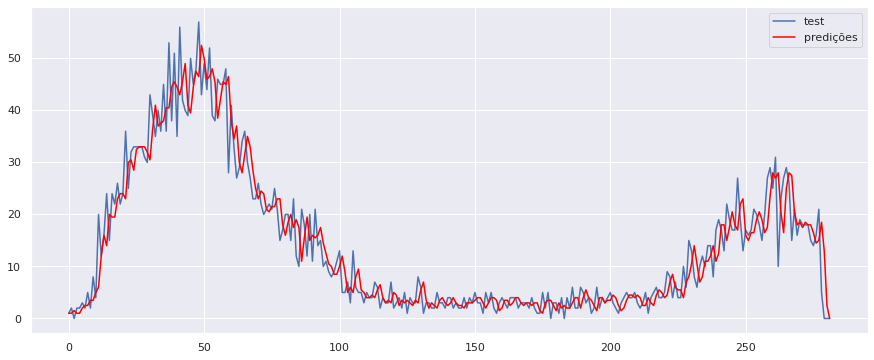

In [151]:
fig= plt.figure(figsize=(15,6))
plt.plot(test)
plt.plot(predicoes, color='red')
plt.legend(['test', 'predições']);
plt.show()